In [2]:
#importing required libreries
import os
import numpy as np
import pandas as pd
import tqdm as tqdm
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization 
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [3]:
input_path = []
label = []

In [4]:
encoder = OneHotEncoder()     #LabelEncoder encode labels with value between 0 and n_classes-1
encoder.fit([[0],[1]])

OneHotEncoder()

In [5]:
#Reading the data that contains tumor
data = []
paths = []
result = []
for r,d,f in os.walk(r"/Users/Ankit Kumar/Downloads/brain_tumor_dataset/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(0)
        input_path.append(os.path.join("Tumor","Tumor",path))
        result.append(encoder.transform([[0]]).toarray())

In [6]:
#Reading the data that does'nt contains tumor
paths = []
for r,d,f in os.walk(r"/Users/Ankit Kumar/Downloads/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(1)
        input_path.append(os.path.join("No Tumor","No Tumor",path))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
len(input_path)

139

In [8]:
result = np.array(result)
result = result.reshape(139,2)

In [9]:
result.shape

(139, 2)

In [10]:
data = np.array(data)
data.shape

(139, 224, 224, 3)

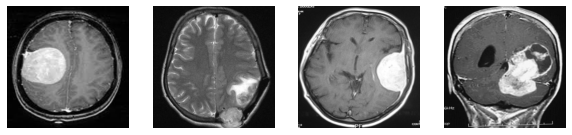

In [11]:
%matplotlib inline
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.axis('off')
plt.show()

In [12]:
x_train , x_test , y_train , y_test = train_test_split(data , result , test_size = 0.25 , shuffle = True , random_state = 1)

In [13]:
print("Shape of an image in x_train : ",x_train[0].shape)
print("Shape of an image in x_test : ",x_test[0].shape)

Shape of an image in x_train :  (224, 224, 3)
Shape of an image in x_test :  (224, 224, 3)


In [14]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
print("x_train Shape : ", x_train.shape) 
print("x_test Shape : ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape :  (104, 224, 224, 3)
x_test Shape :  (35, 224, 224, 3)
y_train Shape:  (104, 2)
y_test Shape:  (35, 2)


In [16]:
#Implementing CNN
modelVGG = VGG16(include_top = False,weights = 'imagenet',classifier_activation = 'soft max',input_shape = (224, 224, 3))

In [17]:
for layer in modelVGG.layers:
    layer.trainable = False

In [18]:
num_classes = 2
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(2,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [19]:
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [20]:
num_classes = 2
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input,outputs = FC_Head)

In [22]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(x_train , y_train , epochs = 15 , validation_data = (x_test , y_test), verbose = 1 , initial_epoch = 0)

Epoch 1/15
4/4 [==============================] - 36s 9s/step - loss: 10.9409 - accuracy: 0.5577 - val_loss: 1.1674 - val_accuracy: 0.6286
Epoch 2/15
4/4 [==============================] - 34s 9s/step - loss: 1.2489 - accuracy: 0.6923 - val_loss: 1.3724 - val_accuracy: 0.6000
Epoch 3/15
4/4 [==============================] - 35s 9s/step - loss: 0.5304 - accuracy: 0.8269 - val_loss: 0.2189 - val_accuracy: 0.8857
Epoch 4/15
4/4 [==============================] - 35s 9s/step - loss: 0.4478 - accuracy: 0.8365 - val_loss: 0.3637 - val_accuracy: 0.8286
Epoch 5/15
4/4 [==============================] - 34s 9s/step - loss: 0.1803 - accuracy: 0.9327 - val_loss: 0.6175 - val_accuracy: 0.7429
Epoch 6/15
4/4 [==============================] - 33s 9s/step - loss: 0.0981 - accuracy: 0.9615 - val_loss: 0.1229 - val_accuracy: 0.9429
Epoch 7/15
4/4 [==============================] - 35s 9s/step - loss: 0.1224 - accuracy: 0.9519 - val_loss: 0.2165 - val_accuracy: 0.9429
Epoch 8/15
4/4 [=================

In [25]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

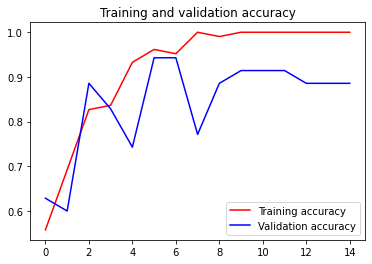

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [27]:
def names(number):
    if number==0:
        return "It's a TUMOR"
    else:
        return "It's NOT a Tumor"

99.37321543693542% Confidence It's a TUMOR


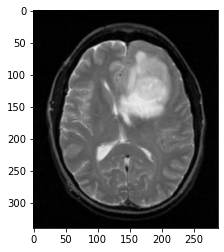

In [28]:
from matplotlib.pyplot import imshow
img = Image.open(r"/Users/Ankit Kumar/Downloads/brain_tumor_dataset/yes/Y66.jpg")
x = np.array(img.resize((224,224)))
x = x.reshape(1,224,224,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))